In [1]:
using Plots
include("polyfit_function.jl")
include("Lagrange_interpolation.jl")
include("LReg.jl")

LReg (generic function with 1 method)

In [3]:
function Ref(f, a, b, u0, m, N)
    dt=(b-a)/N
    t=(0:N)*dt

    DT=m*dt
    U=zeros(1, N+1, 2)
    U[1, 1, 1]=u0
    U[1, 1, 2]=u0
    
    for i=1:m:N

        U[1, i, 1]=U[1, i, 2]
        
        for j=i:i+1
            U[1, j+1, 1]= U[1, j, 1]+dt*f(t[j], U[1, j, 1])
        end
           
        U[1, i+m, 2]= U[1, i, 2]+ DT*(f(t[i], U[1, i, 2])-f(t[i], U[1, i, 1])) + LReg(t[i:i+2], f(t[i:i+2], U[1, i:i+2, 1]), t[i], t[i+2])
        
        # Trapezoidal
        #U[1, i+m, 2]= U[1, i, 2]+ DT*(f(t[i], U[1, i, 2])-f(t[i], U[1, i, 1])) + DT*0.5*(f(t[i], U[1, i, 1])+f(t[i+2], U[1, i+2, 1]))
    end
        
    return  U, t
end

Ref (generic function with 1 method)

In [5]:
function inter(a, b, u0, dt, m)
    uk=zeros(m+1)
    uk[1]=u0
    tv=a:dt:b
    for i=1:m
        uk[i+1]=uk[i]+dt* f(tv[i], uk[i])
    end
    return uk[end]
end

inter (generic function with 1 method)

In [55]:
function twolevel(f, a, b, N, u0, H, m, K)
    dt = (b - a)/ N 
    DT = m*dt
    u = zeros(1, N + 1, K + 1)
    u[1, 1, 1] = u0
    ps = 3:m:N
    u[1, ps, 1] = ones(length(ps)) # initializing random values
    t = (0:N)*dt
    up = zeros(N + 1)
    up[1] = u0

    for k in 1:K
        
        u[1, 1, k + 1] = u0

        #coarsening factor 4

        # F-Relaxation
        for i=1:m:N
            up[i]=u[1, i, k] # injection from the second level
            up[i+1]=H(t[i], t[i+1], up[i], dt, m-1)
        end

        # C-Relaxation
        for j=2:m:N
            up[j+1]=H(t[j], t[j+1], up[j], dt, m-1)
        end

        #for j=3:m:N
            #up[j+1]=H(t[j], t[j+1], up[j], dt, m-3)
       # end
        
        # C-Relaxation
        #for j=4:m:N
            #up[j+1]=H(t[j], t[j+1], up[j], dt, m-3)
       # end
        # Coarse Grid Correction
        for n =1:m:N
            up[n]=u[1, n, k] 
            
            u[1, n+m, k+1] = u[1, n, k+1] + DT*(f(t[n], u[1, n, k+1]) - f(t[n], u[1, n, k] )) + LReg(t[n:n+m], f(t[n:n+m], up[n:n+m]), t[n], t[n+m])

            # Trapezoidal
            #u[1, n+m, k+1] = u[1, n, k+1] + DT*(f(t[n], u[1, n, k+1]) - f(t[n], u[1, n, k])) + DT*0.5*(f(t[n], up[n])+f(t[n+m], up[n+m]))
        end
    end

    return t, u
end

twolevel (generic function with 1 method)

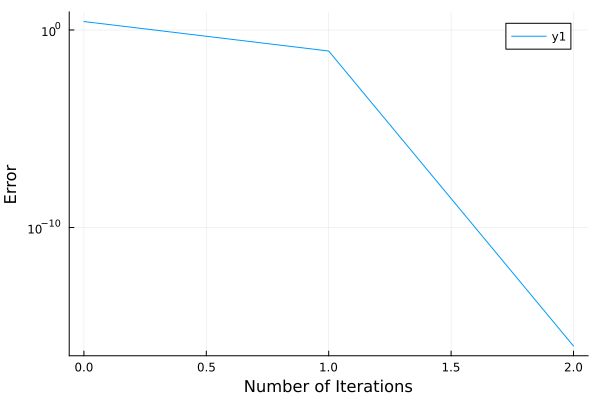

In [59]:
using LinearAlgebra, Plots

u0 = 1.0
a = 0
b = 1
f(t, u) = u 
N = 4
K = 2 # Number of Iterations
m = 2
err=zeros(K+1)
tval, u= twolevel(f, a, b, N, u0, inter, m, K) # Approximate Solution
U, t = Ref(f, a, b, u0, m, N) # Reference Solution
for k=1:K+1
    err[k]= norm(U[1, 1:m:end, 2] .- u[1, 1:m:end, k], Inf) .+ 10^(-16)
end
plot(0:K, err, yaxis=:log, xlabel="Number of Iterations", ylabel="Error")

In [47]:
u

1×5×3 Array{Float64, 3}:
[:, :, 1] =
 1.0  0.0  1.0  0.0  0.0

[:, :, 2] =
 1.0  0.0  1.63542  0.0  2.58854

[:, :, 3] =
 1.0  0.0  1.63542  0.0  2.67459

In [ ]:
u0 = 1.0
a = 0
b = 1.0
f(t, u) = -u .+ sin.(10*t)
N = 60
K = 10 # Number of Iterations
m = 4
U, t = Ref(f, a, b, u0, m, N)

In [ ]:
U

In [ ]:
collect(0:2/4:2)

In [27]:
collect(3:2:4)

1-element Vector{Int64}:
 3